In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

Numerical computations with NumPy.

Building and training neural networks, particularly using LSTM layers, with TensorFlow Keras.
    
Data manipulation and analysis with Pandas.
    
Data visualization with Matplotlib and Seaborn.

Data preprocessing with Scikit-learn.

In [41]:
df = pd.read_csv('Train.csv')
print(df.tail())
df=df.head(700)

             Date      Stock  liabilities      equity  total_assets  \
14995  2018-08-31  Stock 100   810.402398  953.465125   1763.867523   
14996  2018-09-28  Stock 100   811.620957  443.679899   1255.300856   
14997  2018-10-31  Stock 100   739.371050  423.172140   1162.543189   
14998  2018-11-30  Stock 100   741.898496  286.891422   1028.789919   
14999  2018-12-31  Stock 100   772.426342  538.766121   1311.192462   

       current_assets  current_liabilities  total_revenue  net_income  \
14995     1014.718528           957.998121     675.953821  102.346000   
14996      392.059390           365.958118     815.913721 -301.200669   
14997      478.844995           396.603049     550.561664  227.299298   
14998      347.793349           358.229637     176.189978   19.405005   
14999      440.572996           493.849915     586.705439  260.221041   

        dividend  shares_outstanding       price  
14995  21.785595             1016713  101.747952  
14996   0.000000             104

In [6]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


Took this columns for training

In [7]:
df_for_training = df[cols].astype(float)

In [8]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [9]:
trainX = []
trainY = []

In [10]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [11]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (686, 14, 10).
trainY shape == (686, 1).


In [12]:
df_for_training_scaled

array([[ 0.31486897,  1.38534336,  1.21902212, ...,  2.06545121,
        -0.28008488, -0.45787574],
       [-0.53451839,  1.30418034,  0.57329607, ...,  1.03031741,
        -0.08588144, -0.25561204],
       [-0.31418492,  0.18701555, -0.08196534, ...,  0.49594704,
         1.49995748, -0.12505391],
       ...,
       [-1.55300506, -0.80500291, -1.65526365, ..., -0.65423673,
         1.19466622, -2.16216953],
       [ 0.20233458,  1.60852787,  1.30257312, ..., -0.65423673,
        -0.64756263, -2.23899367],
       [-1.45453008, -1.00251114, -1.72997169, ..., -0.65423673,
         1.48363478, -2.30772193]])

In [13]:
trainY

array([[ 4.19095606e-01],
       [ 2.72489763e-01],
       [ 3.37407063e-01],
       [ 2.66595226e-01],
       [ 2.33889509e-01],
       [ 3.07485151e-01],
       [ 4.21691925e-01],
       [ 3.57833854e-01],
       [ 2.15928973e-01],
       [ 4.73053793e-02],
       [ 9.82185968e-02],
       [ 1.49462484e-01],
       [ 2.21106815e-01],
       [ 2.57873982e-01],
       [ 2.96031573e-01],
       [ 3.37617735e-01],
       [ 5.14426955e-01],
       [ 5.47456093e-01],
       [ 6.85630577e-01],
       [ 8.39397375e-01],
       [ 1.07079336e+00],
       [ 1.08513320e+00],
       [ 1.03628803e+00],
       [ 9.39461409e-01],
       [ 8.26432297e-01],
       [ 8.56684763e-01],
       [ 8.79682255e-01],
       [ 9.63867045e-01],
       [ 1.00027934e+00],
       [ 9.74438716e-01],
       [ 1.06041133e+00],
       [ 1.00247208e+00],
       [ 1.04689870e+00],
       [ 1.19699140e+00],
       [ 1.25072115e+00],
       [ 1.25372045e+00],
       [ 1.30810280e+00],
       [ 1.40708557e+00],
       [ 1.2

Sequential() initializes a sequential model, where layers are stacked one after the other. This is suitable for a plain stack of layers with one input and one output.

LSTM(64): Adds an LSTM layer with 64 units (neurons). LSTMs are good for capturing temporal dependencies in sequential data.
                                                                    
activation='relu': Applies the ReLU activation function to the outputs of the LSTM units. Typically, LSTM units use a sigmoid or tanh activation function by default, but ReLU can sometimes be used as an alternative.
    
input_shape=(trainX.shape[1], trainX.shape[2]): Specifies the input shape for the first layer.

trainX.shape[1] is the number of time steps (n_past), and trainX.shape[2] is the number of features (columns).

return_sequences=True: Ensures that the layer returns the full sequence of outputs for each time step, which is necessary for stacking another LSTM layer on top.


Dense(trainY.shape[1]): Adds a Dense layer with a number of units equal to trainY.shape[1]. This layer outputs the final prediction.

In [14]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 14, 64)              │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

vebose is format shown below like the progression bar etc etc 

0: No output.

1: Progress bar with metrics.

2: One line per epoch with metrics.

In [15]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3886 - val_loss: 0.1892
Epoch 2/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0911 - val_loss: 0.0708
Epoch 3/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0755 - val_loss: 0.0559
Epoch 4/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0590 - val_loss: 0.1409
Epoch 5/5
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0447 - val_loss: 0.0662


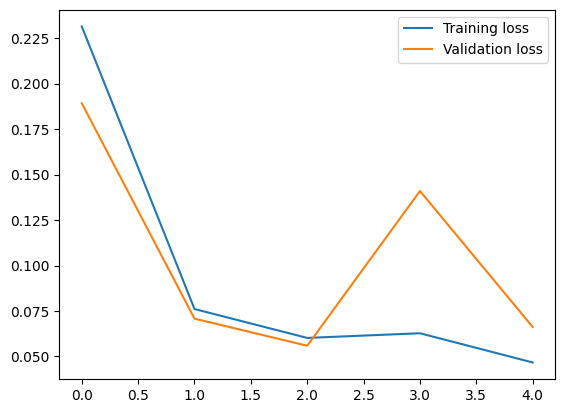

In [16]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [17]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [60]:
 df2= df.head(700)
train_dates = pd.to_datetime(df2['Date'])
train_dates.tail(50)

650   2010-09-30
651   2010-10-29
652   2010-11-30
653   2010-12-31
654   2011-01-31
655   2011-02-28
656   2011-03-31
657   2011-04-29
658   2011-05-31
659   2011-06-30
660   2011-07-29
661   2011-08-31
662   2011-09-30
663   2011-10-31
664   2011-11-30
665   2011-12-30
666   2012-01-31
667   2012-02-29
668   2012-03-30
669   2012-04-30
670   2012-05-31
671   2012-06-29
672   2012-07-31
673   2012-08-31
674   2012-09-28
675   2012-10-31
676   2012-11-30
677   2012-12-31
678   2013-01-31
679   2013-02-28
680   2013-03-29
681   2013-04-30
682   2013-05-31
683   2013-06-28
684   2013-07-31
685   2013-08-30
686   2013-09-30
687   2013-10-31
688   2013-11-29
689   2013-12-31
690   2014-01-31
691   2014-02-28
692   2014-03-31
693   2014-04-30
694   2014-05-30
695   2014-06-30
696   2014-07-31
697   2014-08-29
698   2014-09-30
699   2014-10-31
Name: Date, dtype: datetime64[ns]

Now we will create the time stamp of the future dates so that can be used as time stamp while performing the future price determination 

In [57]:
n_past = 700
n_days_for_prediction=686

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
predict_period_dates

[Timestamp('2006-07-31 00:00:00'),
 Timestamp('2006-08-31 00:00:00'),
 Timestamp('2006-09-30 00:00:00'),
 Timestamp('2006-10-31 00:00:00'),
 Timestamp('2006-11-30 00:00:00'),
 Timestamp('2006-12-31 00:00:00'),
 Timestamp('2007-01-31 00:00:00'),
 Timestamp('2007-02-28 00:00:00'),
 Timestamp('2007-03-31 00:00:00'),
 Timestamp('2007-04-30 00:00:00'),
 Timestamp('2007-05-31 00:00:00'),
 Timestamp('2007-06-30 00:00:00'),
 Timestamp('2007-07-31 00:00:00'),
 Timestamp('2007-08-31 00:00:00'),
 Timestamp('2007-09-30 00:00:00'),
 Timestamp('2007-10-31 00:00:00'),
 Timestamp('2007-11-30 00:00:00'),
 Timestamp('2007-12-31 00:00:00'),
 Timestamp('2008-01-31 00:00:00'),
 Timestamp('2008-02-29 00:00:00'),
 Timestamp('2008-03-31 00:00:00'),
 Timestamp('2008-04-30 00:00:00'),
 Timestamp('2008-05-31 00:00:00'),
 Timestamp('2008-06-30 00:00:00'),
 Timestamp('2008-07-31 00:00:00'),
 Timestamp('2008-08-31 00:00:00'),
 Timestamp('2008-09-30 00:00:00'),
 Timestamp('2008-10-31 00:00:00'),
 Timestamp('2008-11-

In [20]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [25]:
prediction.shape

(686, 1)

here we have converted the shape of the prediction to the shape of the trainign data because since we need to convert back the scaled data and scale inversion takes the size as it have taken before

In [24]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_copies


(686, 10)

Extract Target Feature: [:, 9] selects the 10th feature from the transformed predictions.

In [36]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [37]:
y_pred_future.shape

(686,)

In [38]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [39]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


C:\Users\hp\AppData\Local\Temp\ipykernel_20756\1642182508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.924169
2,2006-09-29,103.166191
3,2006-10-31,104.478956
4,2006-11-30,104.160907
...,...,...
695,2014-06-30,84.438987
696,2014-07-31,84.448964
697,2014-08-29,83.786760
698,2014-09-30,83.055919


In [50]:
df_forecast.head(100)

,Date,price
0,2006-07-31,106.798058
1,2006-08-31,105.728180
2,2006-09-30,106.320930
3,2006-10-31,106.325386
4,2006-11-30,106.550560
...,...,...
95,2014-06-30,124.919395
96,2014-07-31,124.643639
97,2014-08-31,125.515335
98,2014-09-30,125.660866


<Axes: xlabel='Date'>

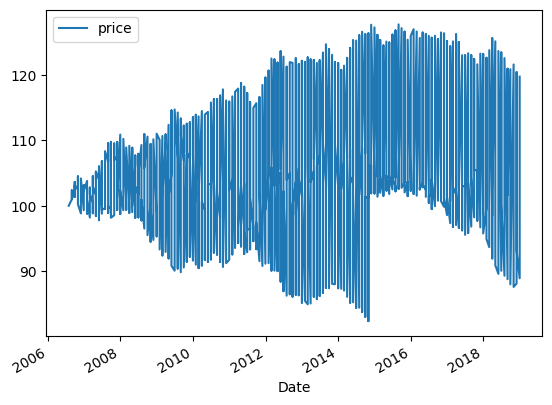

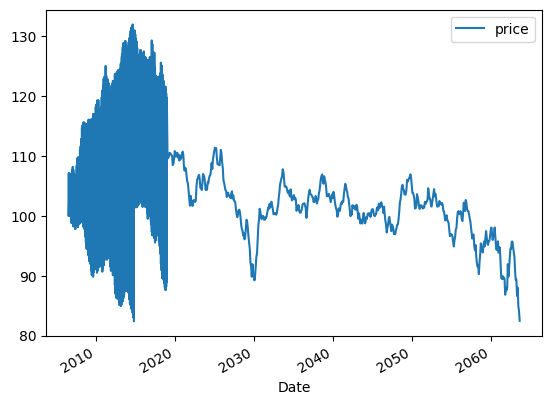

In [24]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [25]:
############################ Finding the efficiency of this model using root mean square analysis as a percentage#######################

for i in range(686):
  df['predicted'] = (df_forecast['price']-df['price'])/(df['price'])
df['predicted'] = df['predicted'].fillna(0)
df['predicted']  

0      0.070820
1      0.040462
2      0.037513
3      0.021791
4      0.023487
         ...   
695    0.000000
696    0.000000
697    0.000000
698    0.000000
699    0.000000
Name: predicted, Length: 700, dtype: float64

In [26]:
Diff = np.array(df['predicted'])

In [27]:
rmsep = np.sqrt(np.mean(np.square((Diff))))

In [28]:
############ Efficiency ####################
Efficiency = 100-rmsep*100
print(str(Efficiency)+" %")

95.6334968777546 %
